In [1]:
import os
from pathlib import Path
import pandas as pd

In [2]:
# Open the UCR folder
path = Path(os.getcwd())
path = path / 'UCR'
path

PosixPath('/Users/adrien.bolling/DataspellProjects/ICLR_Vista/UCR')

In [3]:
# List the folders in the UCR folder
folders = [f for f in path.iterdir() if f.is_dir()]

In [4]:
def load_dataset(path):
    # Load the dataset
    
    # Load the datasets
    data_train = pd.read_csv(path / (path.name + '_TRAIN.tsv'), sep='\t', header=None)
    data_test = pd.read_csv(path / (path.name + '_TEST.tsv'), sep='\t', header=None)
    
    # The labels are in the first column
    y_train = data_train[0]
    y_test = data_test[0]
    X_train = data_train.drop(0, axis=1)
    X_test = data_test.drop(0, axis=1)
    
    return X_train, y_train, X_test, y_test

In [5]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [6]:
def dtw_distance(x, y):
    # Calculate the DTW distance between two time series
    distance, _ = fastdtw(x, y, dist=euclidean)
    return distance

In [7]:
def mean_ts(X):
    # Calculate the mean time series
    return np.mean(X, axis=0)

In [8]:
def dtw_mean_distance(X, mean):
    # Reshape the mean time series
    mean = mean.reshape(-1, 1)
    # Reshape the time series
    X = X.reshape(X.shape[0], X.shape[1], 1)
    # Calculate the DTW distance between the mean time series and all the time series
    return np.array([dtw_distance(mean, x) for x in X])

In [9]:
def dtw_mean(X):
    # Calculate the mean time series and the DTW distance between the mean and all the time series
    mean = mean_ts(X)
    distances = dtw_mean_distance(X, mean)
    return np.mean(distances)

In [10]:
def dtw_mean_dataset(X, y):
    # Calculate the mean time series and the DTW distance between the mean and all the time series for each class of the dataset
    classes = np.unique(y)
    distances = []
    for c in classes:
        X_class = X[y == c]
        X_class = np.array(X_class)
        distances_class = dtw_mean(X_class)
        distances.append(distances_class)
    return distances

In [11]:
# For each dataset, calculate the mean time series and the DTW distance between the mean and all the time series for each class 

distances = []
for folder in folders:
    X_train, y_train, X_test, y_test = load_dataset(folder)
    # Count the NaN values
    # print dataset name and number of NaN values
    print('Dataset:', folder.name)
    print('Number of NaN values in the training set:', X_train.isna().sum().sum())
    distances_dataset = dtw_mean_dataset(X_train, y_train)
    distances.append(distances_dataset)
    
# Save the results
distances_train = pd.DataFrame(distances)
distances_train.to_csv('distances_train.csv', index=False)

Dataset: Haptics
Number of NaN values in the training set: 0
Dataset: SyntheticControl
Number of NaN values in the training set: 0
Dataset: Worms
Number of NaN values in the training set: 0
Dataset: Computers
Number of NaN values in the training set: 0
Dataset: HouseTwenty
Number of NaN values in the training set: 0
Dataset: GestureMidAirD3
Number of NaN values in the training set: 0
Dataset: Chinatown
Number of NaN values in the training set: 0
Dataset: UWaveGestureLibraryAll
Number of NaN values in the training set: 0
Dataset: Strawberry
Number of NaN values in the training set: 0
Dataset: Car
Number of NaN values in the training set: 0
Dataset: GunPointAgeSpan
Number of NaN values in the training set: 0
Dataset: GestureMidAirD2
Number of NaN values in the training set: 0
Dataset: BeetleFly
Number of NaN values in the training set: 0
Dataset: Wafer
Number of NaN values in the training set: 0
Dataset: CBF
Number of NaN values in the training set: 0
Dataset: Adiac
Number of NaN values 

In [12]:
#  Do the same for the test set
distances_test = []
for folder in folders:
    X_train, y_train, X_test, y_test = load_dataset(folder)
    distances_dataset = dtw_mean_dataset(X_test, y_test)
    distances_test.append(distances_dataset)
    
# Save the results
distances_test = pd.DataFrame(distances_test)
distances_test.to_csv('distances_test.csv', index=False)

In [13]:
# Mean the results on axis 1 (the classes) and plot the results for the training set and the test set in a bar plot
import matplotlib.pyplot as plt
distances_train = pd.read_csv('distances_train.csv')
distances_test = pd.read_csv('distances_test.csv')

In [14]:
distances_train = distances_train.mean(axis=1)
distances_test = distances_test.mean(axis=1)

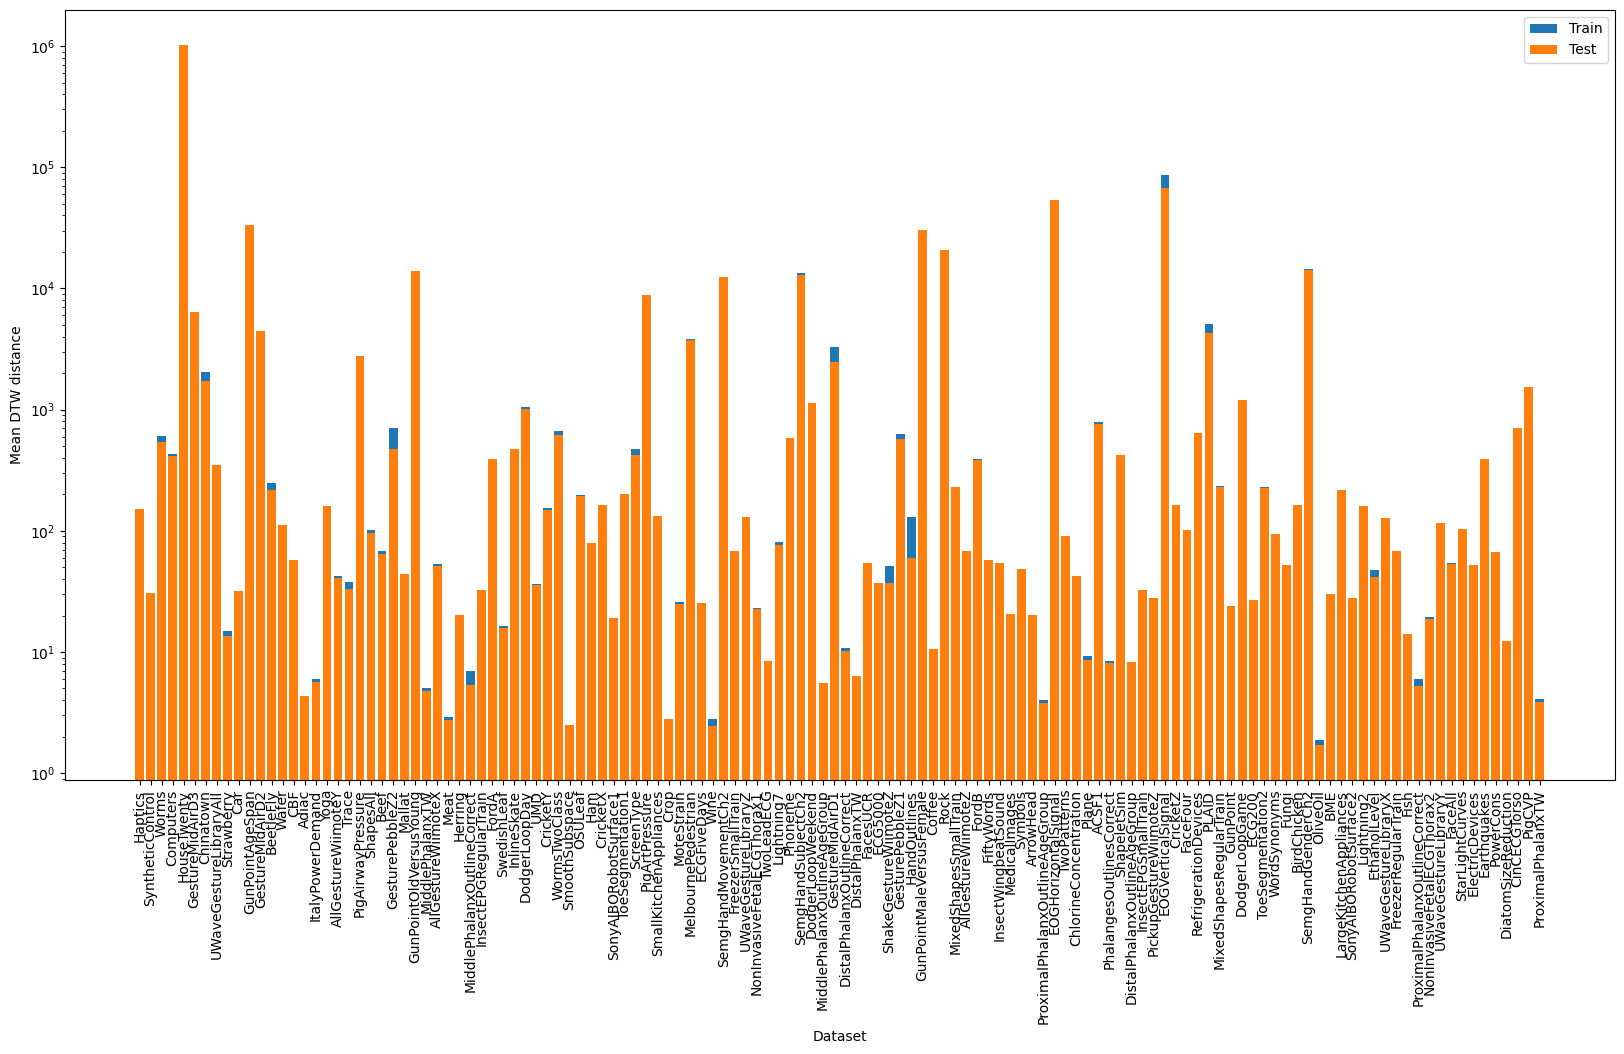

In [16]:
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(distances_train)), distances_train, label='Train')
plt.bar(np.arange(len(distances_test)), distances_test, label='Test')
plt.xticks(np.arange(len(distances_train)), [f.name for f in folders], rotation=90)
plt.xlabel('Dataset')
plt.ylabel('Mean DTW distance')
plt.legend()
# Log scale
plt.yscale('log')
plt.show()

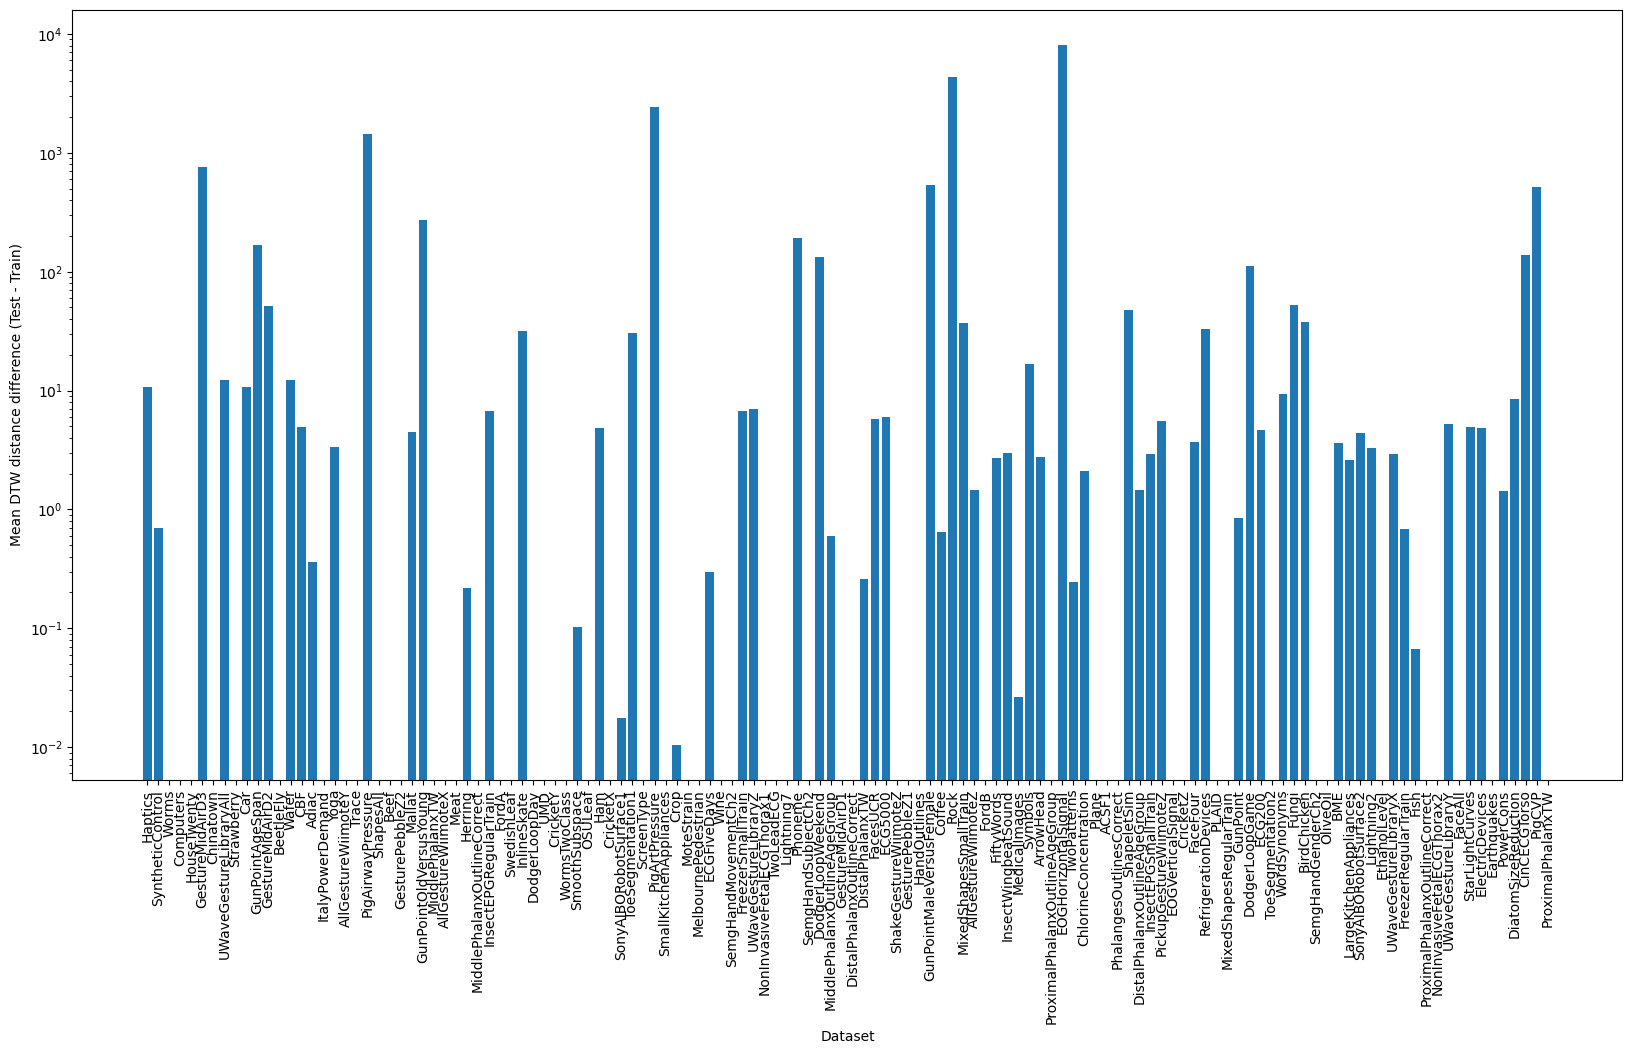

In [18]:
# To better show the results, do a bar plot of the difference between the test and training set
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(distances_train)), distances_test - distances_train)
plt.xticks(np.arange(len(distances_train)), [f.name for f in folders], rotation=90)
plt.xlabel('Dataset')
plt.ylabel('Mean DTW distance difference (Test - Train)')
# Log scale
plt.yscale('log')
plt.show()

In [19]:
# Sort the datasets by the difference between the test and training set
diff = distances_test - distances_train
diff = diff.sort_values()

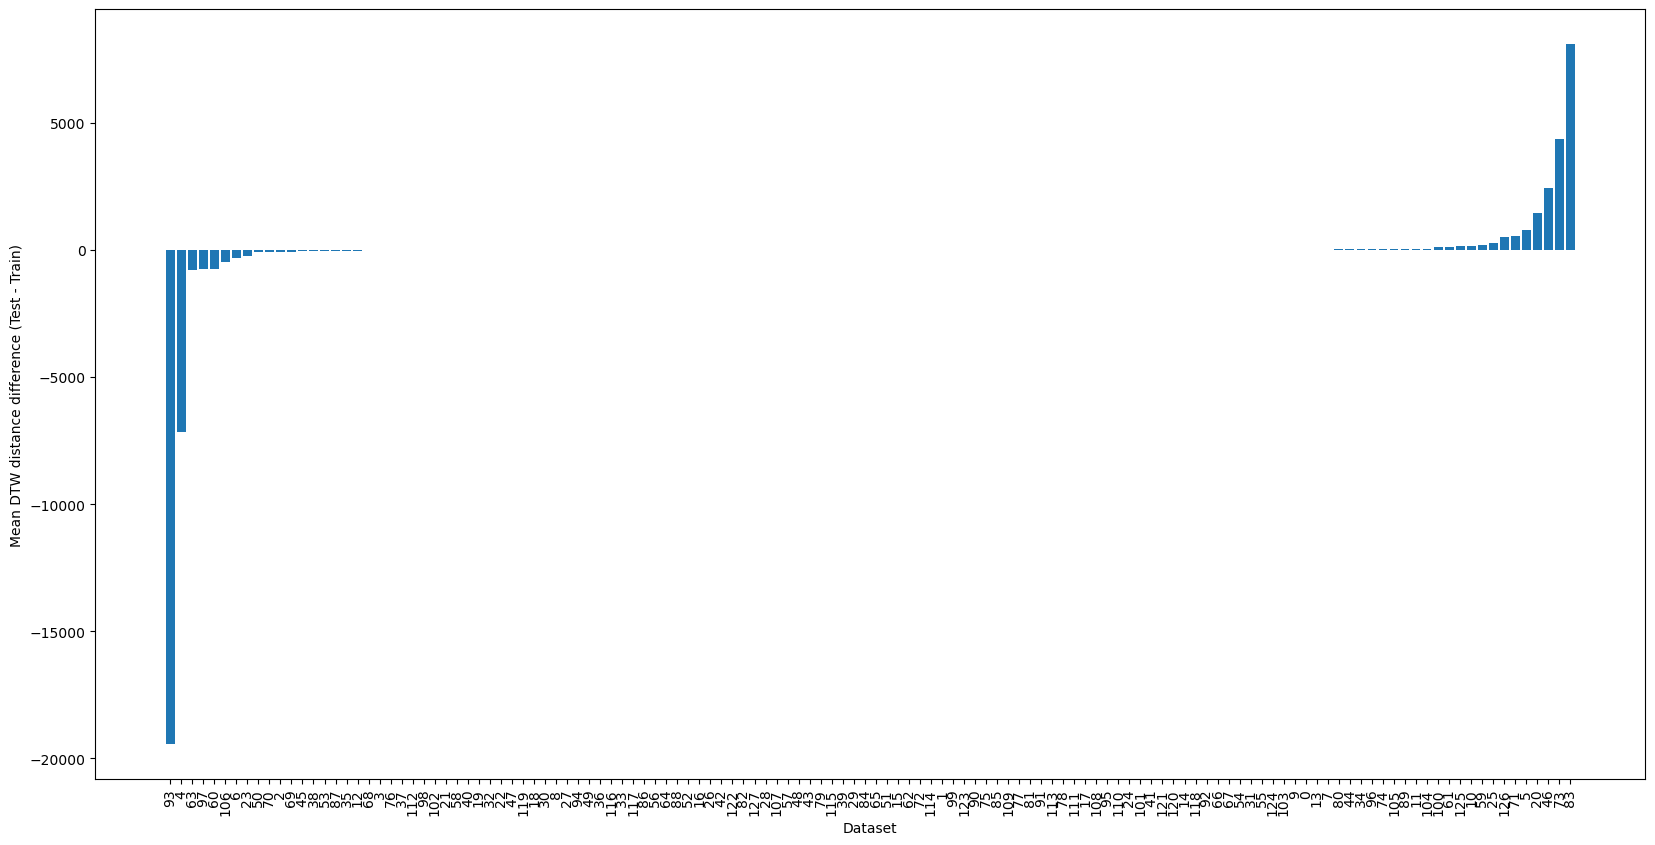

In [21]:
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(diff)), diff)
plt.xticks(np.arange(len(diff)), diff.index, rotation=90)
plt.xlabel('Dataset')
plt.ylabel('Mean DTW distance difference (Test - Train)')
# Log scale
plt.show()